In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import random

#Simple OLS Regressions 

To start, I look at simple OLS regressions of each variable on race performance to see if there are any significant associations between them. 

In [3]:
#These data contain weighted averages for ALL days before a race

df = pd.read_csv('final_race_df.csv')
df2 = pd.read_csv('workout_final_race_df.csv')
df.head(20)

,Unnamed: 0,user_id,race_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,sleep_duration,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K_Heps,FP_10K,VCP_8K_IC4A,race_course
0,0,828,1,45.180328,0.059197,32983054.4242,1609090.757580,4505000.00000,3321818.18182,20104090.9091,5053636.36364,7.000000,80.984848,65.426230,27930909.0909,0,0,0,0,0,0,0,0,0,1529.2,191.1500,03:11.1,0,0,0,0,0,0,FP_8K
1,1,828,2,47.145833,0.055524,35072882.5625,1245231.197920,3633750.00000,4436562.50000,21996562.5000,5001874.94792,5.437500,91.906250,63.802083,30066875.0000,0,0,0,0,0,0,0,0,0,1552.3,194.0375,03:14.0,0,0,1,0,0,0,Brown_8K
2,2,828,3,45.916667,0.074007,35219680.7292,1261142.541670,1525625.00000,7692187.50000,19688750.0000,6312812.50000,3.364583,87.156250,56.385417,28906562.5000,0,0,0,0,0,0,0,0,0,1582.5,197.8125,03:17.8,0,0,0,1,0,0,VCP_8K_Heps
3,3,828,4,44.663366,0.078605,42391598.3267,1041284.366340,3231386.13861,8411584.15842,21082277.2277,9663564.35644,6.584158,96.257426,70.940594,32725247.5248,0,0,0,0,0,0,0,0,0,1932.7,193.2700,03:13.3,0,0,0,0,1,0,FP_10K
4,4,828,5,45.400000,0.066477,35584066.6000,1155980.933330,2920000.00000,7196000.00000,19642000.0000,5788000.00000,5.333333,92.866667,58.733333,29758000.0000,0,0,0,0,0,0,0,0,0,1617.6,202.2000,03:22.2,0,0,0,0,0,1,VCP_8K_IC4A
5,10,2456,1,43.303571,0.070463,31144514.3214,987083.446429,6983571.30357,3776250.00000,16126607.1429,4293214.28571,6.535714,67.178571,40.071429,26886428.4464,0,1,0,0,0,0,0,0,0,1490.9,186.3625,03:06.4,0,0,0,0,0,0,FP_8K
6,11,2456,2,45.318681,0.078180,32313066.8462,911022.582418,3143076.92308,4748901.09890,21305274.7253,3003296.70330,4.692308,78.010989,67.505495,29197252.7473,0,1,0,0,0,0,0,0,0,1476.8,184.6000,03:04.6,0,1,0,0,0,0,Wisco_8K
7,12,2456,3,45.864078,0.078022,30544817.3204,1090239.621360,2326019.41748,4119902.91262,18572330.0971,5283203.88350,5.029126,66.825243,60.398058,25018252.4272,0,1,0,0,0,0,0,0,0,1583.7,197.9625,03:18.0,0,0,0,1,0,0,VCP_8K_Heps
8,13,2456,4,45.394737,0.104513,31598658.1579,1072613.697370,1628684.21053,4693421.05263,19305789.4737,6010263.15789,3.421053,77.881579,71.250000,25627894.7368,0,1,0,0,0,0,0,0,0,1907.7,190.7700,03:10.8,0,0,0,0,1,0,FP_10K
9,14,2456,5,44.111111,0.077258,29843729.7778,1103767.518520,2563333.33333,5328888.88889,16787777.7778,5201111.11111,4.444444,73.740741,50.259259,24680000.0000,0,1,0,0,0,0,0,0,0,1550.2,193.7750,03:13.8,0,0,0,0,0,1,VCP_8K_IC4A


In [4]:
#creating a variable for total sleep
#df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']

In [5]:
#merging the two dataframes
reg_df = pd.merge(df, df2, how='left')

In [6]:
#dropping the first column, which was just the index from when saving the dataframe to a csv earlier
reg_df = reg_df.drop(df.columns[0], axis=1)
reg_df.columns

Index([u'user_id', u'race_period', u'resting_heart_rate', u'hrv_rmssd', u'time_in_bed', u'latency', u'rem_sleep_duration', u'slow_wave_sleep_duration', u'light_sleep_duration', u'wake_duration', u'cycles_count', u'score', u'recovery_score', u'sleep_duration', u'user_2439', u'user_2456', u'user_2458', u'user_2465', u'user_2466', u'user_2468', u'user_2469', u'user_2473', u'user_2508', u'seconds', u'pace_per_k', u'pace_time', u'FP_5K', u'Wisco_8K', u'Brown_8K', u'VCP_8K_Heps', u'FP_10K',
       u'VCP_8K_IC4A', u'race_course', u'z1', u'z2', u'z3', u'z4', u'z5'],
      dtype='object')

In [7]:
reg_df.head(20)

,user_id,race_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,sleep_duration,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K_Heps,FP_10K,VCP_8K_IC4A,race_course,z1,z2,z3,z4,z5
0,828,1,45.180328,0.059197,32983054.4242,1609090.757580,4505000.00000,3321818.18182,20104090.9091,5053636.36364,7.000000,80.984848,65.426230,27930909.0909,0,0,0,0,0,0,0,0,0,1529.2,191.1500,03:11.1,0,0,0,0,0,0,FP_8K,406.527273,702.909091,818.272727,1440.890909,259.927273
1,828,2,47.145833,0.055524,35072882.5625,1245231.197920,3633750.00000,4436562.50000,21996562.5000,5001874.94792,5.437500,91.906250,63.802083,30066875.0000,0,0,0,0,0,0,0,0,0,1552.3,194.0375,03:14.0,0,0,1,0,0,0,Brown_8K,521.626374,444.879121,769.120879,1471.483516,333.890110
2,828,3,45.916667,0.074007,35219680.7292,1261142.541670,1525625.00000,7692187.50000,19688750.0000,6312812.50000,3.364583,87.156250,56.385417,28906562.5000,0,0,0,0,0,0,0,0,0,1582.5,197.8125,03:17.8,0,0,0,1,0,0,VCP_8K_Heps,750.230769,809.208791,601.439560,1558.263736,202.208791
3,828,4,44.663366,0.078605,42391598.3267,1041284.366340,3231386.13861,8411584.15842,21082277.2277,9663564.35644,6.584158,96.257426,70.940594,32725247.5248,0,0,0,0,0,0,0,0,0,1932.7,193.2700,03:13.3,0,0,0,0,1,0,FP_10K,472.142857,373.549451,627.571429,1631.318681,151.912088
4,828,5,45.400000,0.066477,35584066.6000,1155980.933330,2920000.00000,7196000.00000,19642000.0000,5788000.00000,5.333333,92.866667,58.733333,29758000.0000,0,0,0,0,0,0,0,0,0,1617.6,202.2000,03:22.2,0,0,0,0,0,1,VCP_8K_IC4A,410.321429,412.500000,436.857143,1073.107143,79.535714
5,2456,1,43.303571,0.070463,31144514.3214,987083.446429,6983571.30357,3776250.00000,16126607.1429,4293214.28571,6.535714,67.178571,40.071429,26886428.4464,0,1,0,0,0,0,0,0,0,1490.9,186.3625,03:06.4,0,0,0,0,0,0,FP_8K,872.454545,755.690909,814.454545,1406.036364,1683.509091
6,2456,2,45.318681,0.078180,32313066.8462,911022.582418,3143076.92308,4748901.09890,21305274.7253,3003296.70330,4.692308,78.010989,67.505495,29197252.7473,0,1,0,0,0,0,0,0,0,1476.8,184.6000,03:04.6,0,1,0,0,0,0,Wisco_8K,475.153846,486.285714,431.109890,1264.923077,2581.197802
7,2456,3,45.864078,0.078022,30544817.3204,1090239.621360,2326019.41748,4119902.91262,18572330.0971,5283203.88350,5.029126,66.825243,60.398058,25018252.4272,0,1,0,0,0,0,0,0,0,1583.7,197.9625,03:18.0,0,0,0,1,0,0,VCP_8K_Heps,535.989011,464.978022,325.142857,1083.549451,1926.208791
8,2456,4,45.394737,0.104513,31598658.1579,1072613.697370,1628684.21053,4693421.05263,19305789.4737,6010263.15789,3.421053,77.881579,71.250000,25627894.7368,0,1,0,0,0,0,0,0,0,1907.7,190.7700,03:10.8,0,0,0,0,1,0,FP_10K,502.901099,312.384615,143.714286,401.087912,325.153846
9,2456,5,44.111111,0.077258,29843729.7778,1103767.518520,2563333.33333,5328888.88889,16787777.7778,5201111.11111,4.444444,73.740741,50.259259,24680000.0000,0,1,0,0,0,0,0,0,0,1550.2,193.7750,03:13.8,0,0,0,0,0,1,VCP_8K_IC4A,671.750000,260.357143,86.821429,384.500000,802.142857


Here we regress one variable at a time, and also include the dummy variables for both racer and race course.

No significant results

In [8]:
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_IC4A + VCP_8K_Heps + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

In [9]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     10.38
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.28e-06
Time:                        21:16:55   Log-Likelihood:                -83.214
No. Observations:                  36   AIC:                             198.4
Df Residuals:                      20   BIC:                             223.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     193.7100      4.190     46.232      0.000       184.970   202.450
hrv_rmssd     -39.2761     60.487     -0.649      0.524      -165.450    86.898
user_2456      -4.5105      2.310     -1.953      0.065        -9.328     0.307
user_2458       5.5492      4.624      1.200      0.244        -4.095    15.194
user_2465      -2.7942      3.083     -0.906      0.375        -9.224     3.636
user_2466       7.1185      4.989      1.427      0.169        -3.289    17.526
user_2468      -3.6832      2.176     -1.693      0.106        -8.223     0.856
user_2469       1.6129      2.715      0.594      0.559        -4.051     7.277
user_2473      -6.5411      3.982     -1.643      0.116       -14.847     1.765
user_2508      11.3011      3.808      2.968      0.008         3.357    19.245
FP_5K         -12.3192      4.907     -2.510      0.021       -22.556    -2.082
Wisco_8K        0.8024      1.930      0.416      0.682        -3.223     4.828
Brown_8K        0.3191      2.912      0.110      0.914        -5.756     6.394
VCP_8K_Heps     9.8850      1.663      5.943      0.000         6.415    13.355
VCP_8K_IC4A     8.4289      1.622      5.195      0.000         5.045    11.813
FP_10K          4.3977      2.015      2.182      0.041         0.194     8.602
==============================================================================
Omnibus:                        1.404   Durbin-Watson:                   2.569
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                0.517
Skew:                           0.154   Prob(JB):                        0.772
Kurtosis:                       3.500   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     10.75
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.70e-06
Time:                        21:16:55   Log-Likelihood:                -82.644
No. Observations:                  36   AIC:                             197.3
Df Residuals:                      20   BIC:                             222.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            168.2128     22.269      7.554      0.000       121.761   214.665
resting_heart_rate     0.5035      0.485      1.039      0.311        -0.508     1.515
user_2456             -4.6644      2.162     -2.157      0.043        -9.174    -0.154
user_2458              4.9681      3.069      1.619      0.121        -1.434    11.370
user_2465             -5.5372      2.483     -2.230      0.037       -10.717    -0.357
user_2466              4.8011      2.210      2.172      0.042         0.190     9.412
user_2468             -1.9772      2.621     -0.754      0.459        -7.444     3.489
user_2469             -3.7567      6.347     -0.592      0.561       -16.996     9.482
user_2473             -7.3241      2.770     -2.644      0.016       -13.102    -1.546
user_2508              9.8545      3.904      2.524      0.020         1.711    17.998
FP_5K                -15.0270      5.525     -2.720      0.013       -26.552    -3.502
Wisco_8K               0.4505      1.860      0.242      0.811        -3.430     4.331
Brown_8K              -0.0439      2.896     -0.015      0.988        -6.084     5.996
VCP_8K_Heps           10.0178      1.603      6.249      0.000         6.674    13.362
VCP_8K_IC4A            8.3152      1.590      5.229      0.000         4.998    11.632
FP_10K                 4.1573      1.867      2.227      0.038         0.263     8.052
==============================================================================
Omnibus:                        3.753   Durbin-Watson:                   2.421
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.507
Skew:                           0.403   Prob(JB):                        0.286
Kurtosis:                       4.010   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     10.57
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.95e-06
Time:                        21:16:55   Log-Likelihood:                -82.912
No. Observations:                  36   AIC:                             197.8
Df Residuals:                      20   BIC:                             223.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        181.1067     11.735     15.433      0.000       156.628   205.586
sleep_duration  3.357e-07   3.83e-07      0.876      0.391     -4.63e-07  1.13e-06
user_2456         -3.6896      2.637     -1.399      0.177        -9.190     1.811
user_2458          2.9390      2.439      1.205      0.242        -2.148     8.026
user_2465         -2.9370      2.599     -1.130      0.272        -8.358     2.484
user_2466          5.9260      2.915      2.033      0.056        -0.154    12.006
user_2468         -3.3028      2.169     -1.523      0.143        -7.827     1.222
user_2469          2.3609      2.462      0.959      0.349        -2.774     7.496
user_2473         -6.8649      3.165     -2.169      0.042       -13.466    -0.264
user_2508         13.0615      4.401      2.968      0.008         3.881    22.242
FP_5K            -15.3072      5.994     -2.554      0.019       -27.811    -2.804
Wisco_8K           0.0319      1.961      0.016      0.987        -4.058     4.121
Brown_8K           0.5493      2.890      0.190      0.851        -5.480     6.578
VCP_8K_Heps        9.8825      1.596      6.192      0.000         6.553    13.212
VCP_8K_IC4A        8.8394      1.704      5.189      0.000         5.286    12.393
FP_10K             3.5220      1.926      1.828      0.082        -0.497     7.541
==============================================================================
Omnibus:                        1.463   Durbin-Watson:                   2.502
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                0.565
Skew:                           0.182   Prob(JB):                        0.754
Kurtosis:                       3.494   Cond. No.                     6.82e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     10.15
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.73e-06
Time:                        21:16:55   Log-Likelihood:                -83.569
No. Observations:                  36   AIC:                             199.1
Df Residuals:                      20   BIC:                             224.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            191.5808      2.783     68.834      0.000       185.775   197.386
rem_sleep_duration -5.445e-08   3.58e-07     -0.152      0.881     -8.01e-07  6.92e-07
user_2456             -5.0066      2.194     -2.282      0.034        -9.582    -0.431
user_2458              3.4219      3.691      0.927      0.365        -4.277    11.121
user_2465             -4.1776      2.205     -1.895      0.073        -8.776     0.421
user_2466              4.4016      2.557      1.721      0.101        -0.932     9.735
user_2468             -3.5154      2.207     -1.593      0.127        -8.119     1.088
user_2469              2.2764      2.529      0.900      0.379        -2.999     7.552
user_2473             -8.2732      3.059     -2.705      0.014       -14.653    -1.893
user_2508             11.0678      3.828      2.891      0.009         3.083    19.052
FP_5K                -12.4982      5.240     -2.385      0.027       -23.430    -1.567
Wisco_8K               0.4202      2.068      0.203      0.841        -3.894     4.734
Brown_8K               0.3421      2.963      0.115      0.909        -5.839     6.523
VCP_8K_Heps            9.2615      2.109      4.391      0.000         4.862    13.661
VCP_8K_IC4A            8.1020      2.223      3.645      0.002         3.466    12.738
FP_10K                 3.7218      2.356      1.579      0.130        -1.193     8.637
==============================================================================
Omnibus:                        2.216   Durbin-Watson:                   2.594
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.156
Skew:                           0.357   Prob(JB):                        0.561
Kurtosis:                       3.511   Cond. No.                     7.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     10.46
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.13e-06
Time:                        21:16:55   Log-Likelihood:                -83.082
No. Observations:                  36   AIC:                             198.2
Df Residuals:                      20   BIC:                             223.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  193.5159      3.493     55.396      0.000       186.229   200.803
slow_wave_sleep_duration -4.348e-07   5.75e-07     -0.757      0.458     -1.63e-06  7.64e-07
user_2456                   -5.9004      2.448     -2.410      0.026       -11.007    -0.794
user_2458                    2.6613      2.491      1.068      0.298        -2.535     7.857
user_2465                   -4.0365      2.173     -1.858      0.078        -8.569     0.496
user_2466                    2.6124      3.012      0.867      0.396        -3.670     8.894
user_2468                   -3.5809      2.160     -1.658      0.113        -8.086     0.924
user_2469                    1.3155      2.811      0.468      0.645        -4.549     7.180
user_2473                   -9.1439      2.679     -3.414      0.003       -14.731    -3.557
user_2508                    9.6780      4.190      2.310      0.032         0.938    18.418
FP_5K                      -11.9559      4.902     -2.439      0.024       -22.181    -1.730
Wisco_8K                     0.9853      1.970      0.500      0.622        -3.124     5.095
Brown_8K                     0.1317      2.921      0.045      0.964        -5.961     6.224
VCP_8K_Heps                  9.8710      1.621      6.091      0.000         6.491    13.251
VCP_8K_IC4A                  9.4162      2.155      4.369      0.000         4.920    13.912
FP_10K                       4.9768      2.329      2.136      0.045         0.118     9.836
==============================================================================
Omnibus:                        1.386   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.677
Skew:                           0.316   Prob(JB):                        0.713
Kurtosis:                       3.226   Cond. No.                     6.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     11.12
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.29e-06
Time:                        21:16:55   Log-Likelihood:                -82.106
No. Observations:                  36   AIC:                             196.2
Df Residuals:                      20   BIC:                             221.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              183.4481      6.223     29.479      0.000       170.467   196.429
light_sleep_duration  4.051e-07   3.09e-07      1.311      0.205     -2.39e-07  1.05e-06
user_2456               -4.0630      2.227     -1.824      0.083        -8.708     0.582
user_2458                5.6954      3.144      1.811      0.085        -0.864    12.254
user_2465               -2.2078      2.601     -0.849      0.406        -7.634     3.218
user_2466                6.2991      2.642      2.384      0.027         0.788    11.810
user_2468               -2.9549      2.152     -1.373      0.185        -7.443     1.533
user_2469                1.0467      2.598      0.403      0.691        -4.372     6.465
user_2473               -5.2491      3.520     -1.491      0.151       -12.591     2.093
user_2508               12.3058      3.796      3.241      0.004         4.387    20.225
FP_5K                  -17.6119      6.279     -2.805      0.011       -30.710    -4.514
Wisco_8K                -0.5680      2.017     -0.282      0.781        -4.775     3.639
Brown_8K                -0.1026      2.847     -0.036      0.972        -6.042     5.837
VCP_8K_Heps              8.7208      1.602      5.445      0.000         5.380    12.062
VCP_8K_IC4A              8.2463      1.568      5.260      0.000         4.976    11.517
FP_10K                   2.8360      2.010      1.411      0.174        -1.356     7.028
==============================================================================
Omnibus:                        0.901   Durbin-Watson:                   2.603
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.297
Skew:                           0.192   Prob(JB):                        0.862
Kurtosis:                       3.224   Cond. No.                     3.26e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     10.17
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.68e-06
Time:                        21:16:55   Log-Likelihood:                -83.534
No. Observations:                  36   AIC:                             199.1
Df Residuals:                      20   BIC:                             224.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     188.4682     11.380     16.562      0.000       164.730   212.206
time_in_bed  7.883e-08   3.16e-07      0.249      0.806     -5.81e-07  7.39e-07
user_2456      -4.5854      2.818     -1.627      0.119       -10.465     1.294
user_2458       3.1409      2.538      1.238      0.230        -2.153     8.435
user_2465      -3.7243      2.950     -1.263      0.221        -9.877     2.428
user_2466       4.5186      2.532      1.785      0.090        -0.763     9.801
user_2468      -3.3830      2.297     -1.473      0.156        -8.174     1.408
user_2469       2.5569      2.669      0.958      0.349        -3.010     8.124
user_2473      -8.0131      3.292     -2.434      0.024       -14.880    -1.146
user_2508      11.7080      4.640      2.524      0.020         2.030    21.386
FP_5K         -12.8986      5.614     -2.297      0.033       -24.610    -1.187
Wisco_8K        0.3603      2.040      0.177      0.862        -3.895     4.615
Brown_8K        0.3988      2.936      0.136      0.893        -5.725     6.522
VCP_8K_Heps     9.4644      1.555      6.085      0.000         6.220    12.709
VCP_8K_IC4A     8.3217      1.630      5.104      0.000         4.921    11.723
FP_10K          3.6554      2.204      1.658      0.113        -0.942     8.253
==============================================================================
Omnibus:                        1.899   Durbin-Watson:                   2.563
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.895
Skew:                           0.282   Prob(JB):                        0.639
Kurtosis:                       3.527   Cond. No.                     7.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     10.76
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.69e-06
Time:                        21:16:55   Log-Likelihood:                -82.633
No. Observations:                  36   AIC:                             197.3
Df Residuals:                      20   BIC:                             222.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      194.5693      3.643     53.412      0.000       186.970   202.168
cycles_count    -0.5367      0.514     -1.045      0.308        -1.608     0.535
user_2456       -5.3895      2.161     -2.494      0.021        -9.897    -0.883
user_2458        3.9206      2.572      1.524      0.143        -1.444     9.286
user_2465       -4.2286      2.133     -1.983      0.061        -8.678     0.220
user_2466        5.0389      2.279      2.211      0.039         0.286     9.792
user_2468       -3.7513      2.141     -1.752      0.095        -8.217     0.714
user_2469        1.6838      2.519      0.668      0.511        -3.571     6.938
user_2473       -7.5087      2.698     -2.783      0.011       -13.137    -1.881
user_2508        9.6514      3.962      2.436      0.024         1.386    17.917
FP_5K          -13.0494      4.889     -2.669      0.015       -23.248    -2.851
Wisco_8K         0.4719      1.859      0.254      0.802        -3.406     4.349
Brown_8K         0.4546      2.864      0.159      0.875        -5.519     6.428
VCP_8K_Heps      9.0001      1.584      5.683      0.000         5.697    12.303
VCP_8K_IC4A      7.5624      1.752      4.317      0.000         3.908    11.216
FP_10K           3.4832      1.903      1.830      0.082        -0.487     7.454
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   2.542
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.362
Skew:                           0.214   Prob(JB):                        0.835
Kurtosis:                       3.239   Cond. No.                         63.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     10.17
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.68e-06
Time:                        21:16:55   Log-Likelihood:                -83.534
No. Observations:                  36   AIC:                             199.1
Df Residuals:                      20   BIC:                             224.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     188.4682     11.380     16.562      0.000       164.730   212.206
time_in_bed  7.883e-08   3.16e-07      0.249      0.806     -5.81e-07  7.39e-07
user_2456      -4.5854      2.818     -1.627      0.119       -10.465     1.294
user_2458       3.1409      2.538      1.238      0.230        -2.153     8.435
user_2465      -3.7243      2.950     -1.263      0.221        -9.877     2.428
user_2466       4.5186      2.532      1.785      0.090        -0.763     9.801
user_2468      -3.3830      2.297     -1.473      0.156        -8.174     1.408
user_2469       2.5569      2.669      0.958      0.349        -3.010     8.124
user_2473      -8.0131      3.292     -2.434      0.024       -14.880    -1.146
user_2508      11.7080      4.640      2.524      0.020         2.030    21.386
FP_5K         -12.8986      5.614     -2.297      0.033       -24.610    -1.187
Wisco_8K        0.3603      2.040      0.177      0.862        -3.895     4.615
Brown_8K        0.3988      2.936      0.136      0.893        -5.725     6.522
VCP_8K_Heps     9.4644      1.555      6.085      0.000         6.220    12.709
VCP_8K_IC4A     8.3217      1.630      5.104      0.000         4.921    11.723
FP_10K          3.6554      2.204      1.658      0.113        -0.942     8.253
==============================================================================
Omnibus:                        1.899   Durbin-Watson:                   2.563
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.895
Skew:                           0.282   Prob(JB):                        0.639
Kurtosis:                       3.527   Cond. No.                     7.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     10.24
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.53e-06
Time:                        21:16:55   Log-Likelihood:                -83.420
No. Observations:                  36   AIC:                             198.8
Df Residuals:                      20   BIC:                             224.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     190.4883      2.568     74.173      0.000       185.131   195.845
latency      7.158e-07   1.64e-06      0.436      0.667     -2.71e-06  4.14e-06
user_2456      -4.9027      2.199     -2.230      0.037        -9.489    -0.316
user_2458       2.9905      2.472      1.210      0.241        -2.166     8.148
user_2465      -4.1058      2.195     -1.871      0.076        -8.684     0.473
user_2466       4.0731      2.199      1.852      0.079        -0.515     8.661
user_2468      -3.9449      2.354     -1.676      0.109        -8.854     0.965
user_2469       2.5287      2.539      0.996      0.331        -2.767     7.825
user_2473      -8.6059      2.581     -3.335      0.003       -13.989    -3.223
user_2508      11.5519      3.979      2.903      0.009         3.252    19.851
FP_5K         -12.6612      5.028     -2.518      0.020       -23.150    -2.172
Wisco_8K        0.5692      1.900      0.300      0.768        -3.393     4.532
Brown_8K        0.2337      2.951      0.079      0.938        -5.922     6.390
VCP_8K_Heps     9.4504      1.551      6.094      0.000         6.215    12.685
VCP_8K_IC4A     7.9742      1.820      4.382      0.000         4.178    11.770
FP_10K          3.8514      1.904      2.023      0.057        -0.121     7.824
==============================================================================
Omnibus:                        2.626   Durbin-Watson:                   2.565
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.479
Skew:                           0.415   Prob(JB):                        0.477
Kurtosis:                       3.545   Cond. No.                     1.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     11.32
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.11e-06
Time:                        21:16:55   Log-Likelihood:                -81.822
No. Observations:                  36   AIC:                             195.6
Df Residuals:                      20   BIC:                             221.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     175.1228     11.373     15.398      0.000       151.399   198.847
score           0.1883      0.131      1.437      0.166        -0.085     0.462
user_2456      -1.6319      3.152     -0.518      0.610        -8.207     4.943
user_2458       2.1656      2.436      0.889      0.385        -2.916     7.247
user_2465      -1.5337      2.799     -0.548      0.590        -7.373     4.306
user_2466       8.5339      3.667      2.327      0.031         0.886    16.182
user_2468      -2.9403      2.129     -1.381      0.183        -7.382     1.501
user_2469       1.8937      2.407      0.787      0.441        -3.127     6.915
user_2473      -6.5790      2.809     -2.342      0.030       -12.438    -0.720
user_2508      15.6265      4.839      3.229      0.004         5.532    25.721
FP_5K         -19.5021      6.916     -2.820      0.011       -33.929    -5.076
Wisco_8K       -1.0386      2.123     -0.489      0.630        -5.468     3.391
Brown_8K       -0.3066      2.842     -0.108      0.915        -6.235     5.622
VCP_8K_Heps     9.1576      1.499      6.109      0.000         6.031    12.284
VCP_8K_IC4A     7.7065      1.614      4.775      0.000         4.340    11.073
FP_10K          1.7071      2.385      0.716      0.482        -3.267     6.681
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.469
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.175
Skew:                           0.064   Prob(JB):                        0.916
Kurtosis:                       3.317   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     10.20
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.61e-06
Time:                        21:16:55   Log-Likelihood:                -83.479
No. Observations:                  36   AIC:                             199.0
Df Residuals:                      20   BIC:                             224.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        189.4950      5.368     35.303      0.000       178.298   200.692
recovery_score     0.0301      0.086      0.351      0.729        -0.149     0.209
user_2456         -4.8401      2.248     -2.153      0.044        -9.530    -0.150
user_2458          2.5788      2.759      0.935      0.361        -3.176     8.334
user_2465         -4.2866      2.192     -1.955      0.065        -8.860     0.287
user_2466          4.3674      2.234      1.955      0.065        -0.294     9.028
user_2468         -3.6241      2.192     -1.654      0.114        -8.196     0.948
user_2469          2.1551      2.548      0.846      0.408        -3.160     7.470
user_2473         -8.7883      2.687     -3.271      0.004       -14.393    -3.184
user_2508         11.4157      3.954      2.887      0.009         3.168    19.664
FP_5K            -13.2536      5.724     -2.315      0.031       -25.195    -1.313
Wisco_8K           0.2182      2.113      0.103      0.919        -4.190     4.627
Brown_8K           0.2412      2.966      0.081      0.936        -5.945     6.428
VCP_8K_IC4A        8.3364      1.627      5.122      0.000         4.942    11.731
VCP_8K_Heps        9.3135      1.621      5.745      0.000         5.932    12.695
FP_10K             3.6145      2.104      1.718      0.101        -0.774     8.003
==============================================================================
Omnibus:                        2.211   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.150
Skew:                           0.354   Prob(JB):                        0.563
Kurtosis:                       3.515   Cond. No.                         885.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
result13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     10.26
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.49e-06
Time:                        21:16:55   Log-Likelihood:                -83.385
No. Observations:                  36   AIC:                             198.8
Df Residuals:                      20   BIC:                             224.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     192.1563      2.624     73.218      0.000       186.682   197.631
z1             -0.0013      0.003     -0.478      0.638        -0.007     0.004
user_2456      -4.9211      2.189     -2.248      0.036        -9.488    -0.354
user_2458       3.5425      2.712      1.306      0.206        -2.116     9.201
user_2465      -4.2809      2.182     -1.962      0.064        -8.832     0.270
user_2466       4.2765      2.184      1.958      0.064        -0.278     8.832
user_2468      -3.4855      2.183     -1.597      0.126        -8.039     1.068
user_2469       3.3390      3.271      1.021      0.320        -3.485    10.163
user_2473      -8.4616      2.574     -3.287      0.004       -13.831    -3.092
user_2508      10.9507      3.813      2.872      0.009         2.997    18.905
FP_5K         -12.9528      5.151     -2.515      0.021       -23.697    -2.208
Wisco_8K        0.3784      1.928      0.196      0.846        -3.642     4.399
Brown_8K        0.1424      2.973      0.048      0.962        -6.059     6.344
VCP_8K_Heps     9.2557      1.616      5.726      0.000         5.884    12.628
VCP_8K_IC4A     8.0200      1.749      4.585      0.000         4.371    11.669
FP_10K          3.5169      2.084      1.688      0.107        -0.830     7.864
==============================================================================
Omnibus:                        1.361   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                0.605
Skew:                           0.283   Prob(JB):                        0.739
Kurtosis:                       3.289   Cond. No.                     8.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
result14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     10.63
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.86e-06
Time:                        21:16:55   Log-Likelihood:                -82.822
No. Observations:                  36   AIC:                             197.6
Df Residuals:                      20   BIC:                             223.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     193.6622      3.147     61.544      0.000       187.098   200.226
z2             -0.0033      0.004     -0.933      0.362        -0.011     0.004
user_2456      -5.4309      2.187     -2.483      0.022        -9.993    -0.869
user_2458       3.8290      2.586      1.481      0.154        -1.566     9.224
user_2465      -4.5042      2.166     -2.080      0.051        -9.022     0.014
user_2466       5.0641      2.335      2.169      0.042         0.193     9.935
user_2468      -2.5909      2.381     -1.088      0.289        -7.558     2.376
user_2469       3.1564      2.611      1.209      0.241        -2.290     8.603
user_2473      -9.4062      2.702     -3.481      0.002       -15.043    -3.769
user_2508      11.1878      3.751      2.983      0.007         3.364    19.012
FP_5K         -14.5268      5.437     -2.672      0.015       -25.868    -3.186
Wisco_8K        0.3999      1.874      0.213      0.833        -3.508     4.308
Brown_8K       -0.2281      2.956     -0.077      0.939        -6.394     5.938
VCP_8K_Heps     9.1851      1.556      5.903      0.000         5.939    12.431
VCP_8K_IC4A     7.4116      1.877      3.948      0.001         3.495    11.328
FP_10K          2.8258      2.209      1.279      0.216        -1.783     7.434
==============================================================================
Omnibus:                        1.161   Durbin-Watson:                   2.666
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.398
Skew:                           0.185   Prob(JB):                        0.820
Kurtosis:                       3.359   Cond. No.                     8.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
result15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     10.67
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           1.80e-06
Time:                        21:16:55   Log-Likelihood:                -82.760
No. Observations:                  36   AIC:                             197.5
Df Residuals:                      20   BIC:                             222.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     189.4397      2.614     72.483      0.000       183.988   194.891
z3              0.0024      0.002      0.971      0.343        -0.003     0.007
user_2456      -4.3108      2.264     -1.904      0.071        -9.034     0.412
user_2458       2.4635      2.491      0.989      0.334        -2.732     7.659
user_2465      -4.9510      2.270     -2.181      0.041        -9.686    -0.216
user_2466       2.6167      2.691      0.972      0.342        -2.996     8.230
user_2468      -4.4198      2.317     -1.908      0.071        -9.253     0.413
user_2469       1.6356      2.553      0.641      0.529        -3.689     6.960
user_2473      -7.4546      2.755     -2.705      0.014       -13.202    -1.707
user_2508      10.3034      3.820      2.697      0.014         2.334    18.272
FP_5K         -10.0952      5.323     -1.896      0.072       -21.199     1.009
Wisco_8K        0.0751      1.925      0.039      0.969        -3.941     4.091
Brown_8K        0.0832      2.892      0.029      0.977        -5.949     6.115
VCP_8K_Heps     9.5217      1.522      6.256      0.000         6.347    12.697
VCP_8K_IC4A     9.2208      1.839      5.013      0.000         5.384    13.057
FP_10K          4.7436      2.039      2.326      0.031         0.490     8.997
==============================================================================
Omnibus:                        1.422   Durbin-Watson:                   2.565
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.758
Skew:                           0.345   Prob(JB):                        0.685
Kurtosis:                       3.172   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
result16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     10.28
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.46e-06
Time:                        21:16:55   Log-Likelihood:                -83.367
No. Observations:                  36   AIC:                             198.7
Df Residuals:                      20   BIC:                             224.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     189.9505      3.219     59.015      0.000       183.236   196.665
z4              0.0008      0.002      0.499      0.623        -0.002     0.004
user_2456      -4.5960      2.343     -1.962      0.064        -9.483     0.291
user_2458       2.7083      2.540      1.066      0.299        -2.589     8.006
user_2465      -3.7599      2.362     -1.592      0.127        -8.687     1.167
user_2466       3.8676      2.277      1.699      0.105        -0.882     8.617
user_2468      -3.6745      2.189     -1.678      0.109        -8.241     0.892
user_2469       2.2923      2.494      0.919      0.369        -2.910     7.494
user_2473      -8.1931      2.653     -3.088      0.006       -13.727    -2.659
user_2508      11.0539      3.805      2.905      0.009         3.116    18.991
FP_5K         -11.0342      5.486     -2.011      0.058       -22.479     0.410
Wisco_8K        0.3807      1.923      0.198      0.845        -3.631     4.393
Brown_8K        0.4161      2.922      0.142      0.888        -5.680     6.512
VCP_8K_Heps     9.7021      1.611      6.022      0.000         6.341    13.063
VCP_8K_IC4A     8.7864      1.861      4.721      0.000         4.904    12.668
FP_10K          4.4089      2.119      2.081      0.051        -0.011     8.829
==============================================================================
Omnibus:                        1.588   Durbin-Watson:                   2.557
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.695
Skew:                           0.267   Prob(JB):                        0.706
Kurtosis:                       3.422   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
result17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     10.16
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.69e-06
Time:                        21:16:55   Log-Likelihood:                -83.542
No. Observations:                  36   AIC:                             199.1
Df Residuals:                      20   BIC:                             224.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     191.3991      1.945     98.419      0.000       187.342   195.456
z5             -0.0005      0.002     -0.230      0.820        -0.005     0.004
user_2456      -4.4357      3.380     -1.312      0.204       -11.487     2.615
user_2458       2.9299      2.503      1.171      0.255        -2.290     8.150
user_2465      -4.3150      2.228     -1.937      0.067        -8.963     0.333
user_2466       4.1982      2.187      1.919      0.069        -0.365     8.761
user_2468      -3.5465      2.188     -1.621      0.121        -8.110     1.017
user_2469       2.2486      2.528      0.889      0.384        -3.025     7.522
user_2473      -8.6772      2.669     -3.251      0.004       -14.244    -3.110
user_2508      11.0577      3.824      2.892      0.009         3.081    19.034
FP_5K         -12.3756      4.987     -2.482      0.022       -22.777    -1.974
Wisco_8K        0.7060      2.034      0.347      0.732        -3.537     4.949
Brown_8K        0.4268      2.939      0.145      0.886        -5.703     6.557
VCP_8K_Heps     9.5153      1.563      6.087      0.000         6.254    12.776
VCP_8K_IC4A     8.2555      1.663      4.963      0.000         4.786    11.725
FP_10K          3.7831      2.010      1.882      0.075        -0.410     7.977
==============================================================================
Omnibus:                        2.275   Durbin-Watson:                   2.593
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.191
Skew:                           0.353   Prob(JB):                        0.551
Kurtosis:                       3.543   Cond. No.                     6.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###10 days weighted
To avoid printing everything, I run the same analysis for the other weighted average dataframes, and summarize any significant results below:

In [26]:
df = pd.read_csv('final_race_df_10daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_10daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

Significant results:
- sleep score, weighted 4 days. The coefficient is 0.19 and the p-value is 0.08
- sleep latency, weighted 2 days. Coefficient is very small and positive, p-value is 0.07
- z1 weighted 2 days. Coefficient is very small and negative, p-value 0.059
- z2 weighted 2 days. Coefficient is very small and negative, p-value 0.064
- z3 weighted 2 days. Coefficient is very small and negative, p-value 0.064

###7 Days weighted

In [27]:
df = pd.read_csv('final_race_df_7daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_7daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

###Weighted 6 Days

In [28]:
df = pd.read_csv('final_race_df_6daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_6daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

###4 days weighted

In [29]:
df = pd.read_csv('final_race_df_4daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_4daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

In [30]:
print result11.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     12.04
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           6.63e-07
Time:                        21:16:57   Log-Likelihood:                -80.828
No. Observations:                  36   AIC:                             193.7
Df Residuals:                      20   BIC:                             219.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     173.3463      9.988     17.356      

###3 days weighted

In [31]:
df = pd.read_csv('final_race_df_3daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_3daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

###2 days weighted

In [32]:
df = pd.read_csv('final_race_df_2daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_2daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=reg_df).fit()

In [33]:
print result15.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     12.34
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           5.37e-07
Time:                        21:16:58   Log-Likelihood:                -80.423
No. Observations:                  36   AIC:                             192.8
Df Residuals:                      20   BIC:                             218.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     192.4970      1.814    106.127      

In [34]:
print result14.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     12.34
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           5.37e-07
Time:                        21:16:58   Log-Likelihood:                -80.424
No. Observations:                  36   AIC:                             192.8
Df Residuals:                      20   BIC:                             218.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     192.1080      1.755    109.455      

In [35]:
print result13.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     12.42
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           5.07e-07
Time:                        21:16:58   Log-Likelihood:                -80.312
No. Observations:                  36   AIC:                             192.6
Df Residuals:                      20   BIC:                             218.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     191.3401      1.697    112.760      

In [36]:
print result10.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     11.61
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.40e-06
Time:                        21:16:58   Log-Likelihood:                -75.707
No. Observations:                  34   AIC:                             183.4
Df Residuals:                      18   BIC:                             207.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     185.6542      3.169     58.576      

#Looking at just the individual days before the race - OLS regressions

###The night before the race (when buildup_day = 0, as that sleep data is from the night before)

Some things that came up as significant, but likely because of random error

- Latency is significant the night before the race, but the coefficient is basically zero with a pvalue of 0.002
- Sleep score has a coefficient of 0.21 and p-pvalue of 0.08

In [37]:
df = pd.read_csv('race_df_pre_weighting.csv')
dummies = pd.get_dummies(df['user_id'], prefix='user')
temp_df = pd.concat([df, dummies], axis=1)
race_times = pd.read_csv('huxc_race_times.csv')
race_times=race_times[race_times['user_id']!=2461]
race_times=race_times[race_times['user_id']!=2509]
reg_df = temp_df.merge(race_times, how='left')
reg_df = reg_df[reg_df['user_id']!=2439]
reg_df = reg_df.drop(['user_828'], axis=1)
reg_df = reg_df.drop(df.columns[0], axis=1).reset_index(drop=True)

#Use to see if each of the 5 days leading up to a race have significant variables
reg_df0 = reg_df[reg_df['buildup_days']==0].reset_index(drop=True)
reg_df1 = reg_df[reg_df['buildup_days']==1].reset_index(drop=True)
reg_df2 = reg_df[reg_df['buildup_days']==2].reset_index(drop=True)
reg_df3 = reg_df[reg_df['buildup_days']==3].reset_index(drop=True)
reg_df4 = reg_df[reg_df['buildup_days']==4].reset_index(drop=True)
reg_df5 = reg_df[reg_df['buildup_days']==5].reset_index(drop=True)
reg_df6 = reg_df[reg_df['buildup_days']==6].reset_index(drop=True)
reg_df7 = reg_df[reg_df['buildup_days']==7].reset_index(drop=True)
reg_df8 = reg_df[reg_df['buildup_days']==8].reset_index(drop=True)
reg_df9 = reg_df[reg_df['buildup_days']==9].reset_index(drop=True)
reg_df10 = reg_df[reg_df['buildup_days']==10].reset_index(drop=True)

####Only showing results that came up significant

In [38]:
def ols_regressions(y_var, x_vars, df):
    return sm.ols(formula= y_var + "~ " + x_vars + " + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K_Heps + VCP_8K_IC4A + FP_10K", data=df).fit().summary()

latency: small and positive coefficient, p-value 0.024

In [39]:
result1 = ols_regressions('pace_per_k', 'hrv_rmssd', reg_df0)
result2 = ols_regressions('pace_per_k', 'resting_heart_rate', reg_df0)
result3 = ols_regressions('pace_per_k', 'sleep_duration', reg_df0)
result4 = ols_regressions('pace_per_k', 'rem_sleep_duration', reg_df0)
result5 = ols_regressions('pace_per_k', 'slow_wave_sleep_duration', reg_df0)
result6 = ols_regressions('pace_per_k', 'light_sleep_duration', reg_df0)
result7 = ols_regressions('pace_per_k', 'time_in_bed', reg_df0)
result8 = ols_regressions('pace_per_k', 'cycles_count', reg_df0)
result9 = ols_regressions('pace_per_k', 'latency', reg_df0)
result10 = ols_regressions('pace_per_k', 'score', reg_df0)
result11 = ols_regressions('pace_per_k', 'recovery_score', reg_df0)

In [40]:
print result9

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     18.14
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           2.63e-06
Time:                        21:16:58   Log-Likelihood:                -55.152
No. Observations:                  29   AIC:                             142.3
Df Residuals:                      13   BIC:                             164.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     181.9735      3.673     49.540      

##2 nights before the race

- REM sleep has a very small and negative coefficient but p-value of 0.032
- light sleep has a very small and positive coefficient but p-value of 0.018

In [41]:
result1 = ols_regressions('pace_per_k', 'hrv_rmssd', reg_df1)
result2 = ols_regressions('pace_per_k', 'resting_heart_rate', reg_df1)
result3 = ols_regressions('pace_per_k', 'sleep_duration', reg_df1)
result4 = ols_regressions('pace_per_k', 'rem_sleep_duration', reg_df1)
result5 = ols_regressions('pace_per_k', 'slow_wave_sleep_duration', reg_df1)
result6 = ols_regressions('pace_per_k', 'light_sleep_duration', reg_df1)
result7 = ols_regressions('pace_per_k', 'time_in_bed', reg_df1)
result8 = ols_regressions('pace_per_k', 'cycles_count', reg_df1)
result9 = ols_regressions('pace_per_k', 'latency', reg_df1)
result10 = ols_regressions('pace_per_k', 'score', reg_df1)
result11 = ols_regressions('pace_per_k', 'recovery_score', reg_df1)

In [42]:
print result6

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     12.86
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           3.33e-06
Time:                        21:16:58   Log-Likelihood:                -68.853
No. Observations:                  32   AIC:                             169.7
Df Residuals:                      16   BIC:                             193.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              173.0307 

In [43]:
print result4

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     11.97
Date:                Mon, 08 Feb 2016   Prob (F-statistic):           5.47e-06
Time:                        21:16:58   Log-Likelihood:                -69.910
No. Observations:                  32   AIC:                             171.8
Df Residuals:                      16   BIC:                             195.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            194.0687      2

#Regression Assumption Plots

In [44]:
#x = sm.ols(formula= "pace_per_k ~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

#def regression_assumption_plots(regression_fit):

#x = sm.ols(formula= "pace_per_k ~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [45]:
#plt.hist(x.resid)

#Regression  Assumptions

C:\Users\BUCKBEAK\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


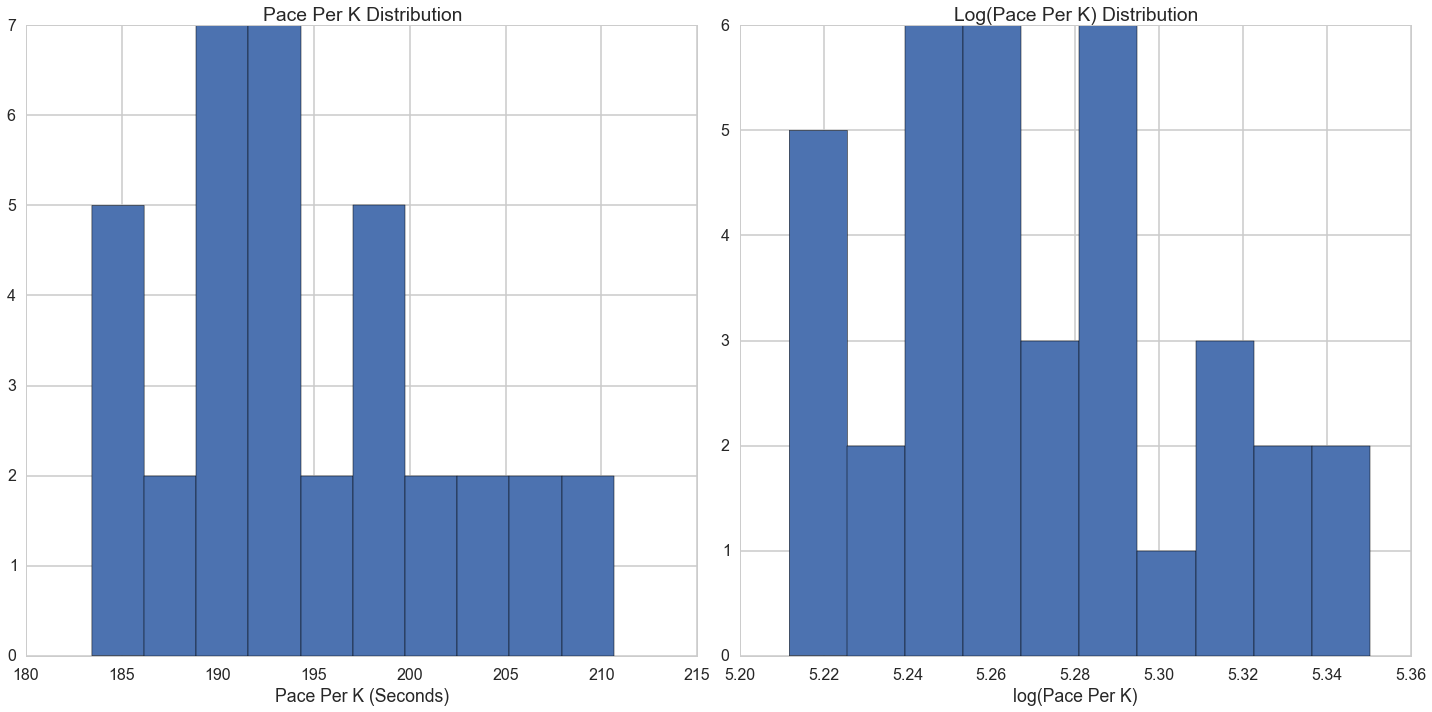

In [46]:
df = pd.read_csv('final_race_df.csv')
y_vars_temp = df.pace_per_k.values
y_vars = []
for i in y_vars_temp:
    if ~np.isnan(i):
        y_vars.append(i)
data = [y_vars, np.log(y_vars)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), tight_layout=True)
for ax, i in zip(axes.ravel(), range(0, len(data))):
    ax.hist(data[i])
    if i == 0:
        ax.set_xlabel('Pace Per K (Seconds)')
        ax.set_title('Pace Per K Distribution')
    elif i == 1:
        ax.set_xlabel('log(Pace Per K)')
        ax.set_title('Log(Pace Per K) Distribution')

#Mixed Effects Models

#P-Value Correction for Multiple Comparisons

With 11 or 16 variables to investigate, I need a way to correct for multiple comparisons. I would like an overall alpha level to be 0.05. To do this, I can use a permutation method:

In a given dataframe, I can fix the dependent variables (here, the race pace per kilometer) for each person. That is, each person has five race results (or less if the person raced fewer times) associated with them. I re-sample the individual IDs to assign a random ID to a group of race results. Then, within the person's newly assigned 5 races, I re-sample the rows of data. 

Each time I create a new dataframe by shuffling user ID's followed by physiological data, I calculate each regression model for each of the 16 variables. Then, I store the lowest p-value recorded. I do this shuffling and regression process 10,000 times, storing the lowest p-value every time. Once I have the list of smallest p-values, I find the smallest 5% and use that corrected alpha level to compare results against. 

In [80]:
# Connect to an R session
import rpy2.robjects
r = rpy2.robjects.r
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
from rpy2.robjects.environments import Environment
from rpy2.robjects import pandas2ri
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

#Specify path with downloaded R packages
lib_path = 'C:/Users/BUCKBEAK/Documents/BUCKBEAK/R/win-library/3.2'

# load some required packages
utils = importr('utils')
langR = importr('languageR', lib_loc=lib_path)
lme4 = importr('lme4', lib_path)
lmerTest=importr('lmerTest', lib_path)

In [48]:
def mixed_effects_model(dftouse, env, y_var, x_var, group_vars=None):
    env = env
    if group_vars == None:
        print 'Not a mixed effects model!'
        return 'Not a mixed effects model!'
    for varname in r.colnames(dftouse):
        env[varname] = dftouse.rx2(varname)
    if type(group_vars) == str:
        formula = Formula(y_var + ' ~ ' + x_var + ' + (1|' + group_vars + ')', environment = env)
        model = lmerTest.lmer(formula)
        return r.summary(model)
    elif type(group_vars)== tuple or type(group_vars)== list:
        if len(group_vars) == 2:
            formula = Formula(y_var + ' ~ ' + x_var + ' + (1|' + group_vars[0] + ') + (1|' + group_vars[1] + ')', environment=env)
            model = lmerTest.lmer(formula)
            return r.summary(model)
        elif len(group_vars) == 3:
            formula =Formula(y_var + ' ~ ' + x_var + ' + (1|' + group_vars[0] + ' ' + group_vars[1] + ' ' + group_vars[2]+ ')', 
                             environment = env)
            model = lmerTest.lmer(formula)
            return r.summary(model)
    

In [49]:
#Just to have a df to test the function with
df = pd.read_csv('final_race_df.csv')
df2 = pd.read_csv('workout_final_race_df.csv')
test_df = pd.merge(df, df2, how='left')
test_df = test_df.drop(test_df.columns[0], axis=1)
test_df.head(10)

,user_id,race_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,sleep_duration,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K_Heps,FP_10K,VCP_8K_IC4A,race_course,z1,z2,z3,z4,z5
0,828,1,45.180328,0.059197,32983054.4242,1609090.757580,4505000.00000,3321818.18182,20104090.9091,5053636.36364,7.000000,80.984848,65.426230,27930909.0909,0,0,0,0,0,0,0,0,0,1529.2,191.1500,03:11.1,0,0,0,0,0,0,FP_8K,406.527273,702.909091,818.272727,1440.890909,259.927273
1,828,2,47.145833,0.055524,35072882.5625,1245231.197920,3633750.00000,4436562.50000,21996562.5000,5001874.94792,5.437500,91.906250,63.802083,30066875.0000,0,0,0,0,0,0,0,0,0,1552.3,194.0375,03:14.0,0,0,1,0,0,0,Brown_8K,521.626374,444.879121,769.120879,1471.483516,333.890110
2,828,3,45.916667,0.074007,35219680.7292,1261142.541670,1525625.00000,7692187.50000,19688750.0000,6312812.50000,3.364583,87.156250,56.385417,28906562.5000,0,0,0,0,0,0,0,0,0,1582.5,197.8125,03:17.8,0,0,0,1,0,0,VCP_8K_Heps,750.230769,809.208791,601.439560,1558.263736,202.208791
3,828,4,44.663366,0.078605,42391598.3267,1041284.366340,3231386.13861,8411584.15842,21082277.2277,9663564.35644,6.584158,96.257426,70.940594,32725247.5248,0,0,0,0,0,0,0,0,0,1932.7,193.2700,03:13.3,0,0,0,0,1,0,FP_10K,472.142857,373.549451,627.571429,1631.318681,151.912088
4,828,5,45.400000,0.066477,35584066.6000,1155980.933330,2920000.00000,7196000.00000,19642000.0000,5788000.00000,5.333333,92.866667,58.733333,29758000.0000,0,0,0,0,0,0,0,0,0,1617.6,202.2000,03:22.2,0,0,0,0,0,1,VCP_8K_IC4A,410.321429,412.500000,436.857143,1073.107143,79.535714
5,2456,1,43.303571,0.070463,31144514.3214,987083.446429,6983571.30357,3776250.00000,16126607.1429,4293214.28571,6.535714,67.178571,40.071429,26886428.4464,0,1,0,0,0,0,0,0,0,1490.9,186.3625,03:06.4,0,0,0,0,0,0,FP_8K,872.454545,755.690909,814.454545,1406.036364,1683.509091
6,2456,2,45.318681,0.078180,32313066.8462,911022.582418,3143076.92308,4748901.09890,21305274.7253,3003296.70330,4.692308,78.010989,67.505495,29197252.7473,0,1,0,0,0,0,0,0,0,1476.8,184.6000,03:04.6,0,1,0,0,0,0,Wisco_8K,475.153846,486.285714,431.109890,1264.923077,2581.197802
7,2456,3,45.864078,0.078022,30544817.3204,1090239.621360,2326019.41748,4119902.91262,18572330.0971,5283203.88350,5.029126,66.825243,60.398058,25018252.4272,0,1,0,0,0,0,0,0,0,1583.7,197.9625,03:18.0,0,0,0,1,0,0,VCP_8K_Heps,535.989011,464.978022,325.142857,1083.549451,1926.208791
8,2456,4,45.394737,0.104513,31598658.1579,1072613.697370,1628684.21053,4693421.05263,19305789.4737,6010263.15789,3.421053,77.881579,71.250000,25627894.7368,0,1,0,0,0,0,0,0,0,1907.7,190.7700,03:10.8,0,0,0,0,1,0,FP_10K,502.901099,312.384615,143.714286,401.087912,325.153846
9,2456,5,44.111111,0.077258,29843729.7778,1103767.518520,2563333.33333,5328888.88889,16787777.7778,5201111.11111,4.444444,73.740741,50.259259,24680000.0000,0,1,0,0,0,0,0,0,0,1550.2,193.7750,03:13.8,0,0,0,0,0,1,VCP_8K_IC4A,671.750000,260.357143,86.821429,384.500000,802.142857


In [50]:
def shuffle_df(df):
    #Use to randomize user_id to different sets of races
    runnerA=df[0:5].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerB=df[5:10].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerC=df[10:15].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerD=df[15:20].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerE=df[20:25].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerF=df[25:30].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerG=df[30:35].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerH=df[35:40].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerI=df[40:45].drop(['user_id'],axis=1).reset_index(drop=True)
    users = list(set(df.user_id))
    random.shuffle(users, random.random)
    dfdict = {1: runnerA, 2: runnerB, 3: runnerC, 4: runnerD, 5: runnerE, 6: runnerF, 7: runnerG, 8: runnerH, 9: runnerI}
    for i in range(0, len(users)):
        dfdict[i+1]['user_id'] = users[i] 
    random.shuffle(runnerA.pace_per_k, random.random)
    random.shuffle(runnerB.pace_per_k, random.random)
    random.shuffle(runnerC.pace_per_k, random.random)
    random.shuffle(runnerD.pace_per_k, random.random)
    random.shuffle(runnerE.pace_per_k, random.random)
    random.shuffle(runnerF.pace_per_k, random.random)
    random.shuffle(runnerG.pace_per_k, random.random)
    random.shuffle(runnerH.pace_per_k, random.random)
    random.shuffle(runnerI.pace_per_k, random.random)
    frames = [runnerA, runnerB, runnerC, runnerD, runnerE, runnerF, runnerG, runnerH, runnerI]
    new_df = pd.concat(frames).reset_index(drop=True)
    colnames = new_df.columns.tolist()
    colnames = colnames[-1:] + colnames[:-1]
    new_df = new_df[colnames]
    return new_df 
    

In [55]:
#result1 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var=x_var, group_vars = ['user_id', 'race_course'])

In [97]:
def adjusted_alpha(reg_df, env, group_vars, weighted=False):
    env=env
    pandas2ri.activate()
    if (group_vars == ['user_id', 'race_course']) or (group_vars == 'user_id'):
        #list to keep minimum p_values
        min_pvals = []

        for i in range(0, 2):
            #shuffle the dataframe
            shuf_df = shuffle_df(df=reg_df)
            
            #switch to R dataframe
            r_shuf_df = pandas2ri.py2ri(shuf_df)

            #list of p_values
            p_values = []

            #Run all 16 regressions
            result1 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = group_vars)
            result2 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = group_vars)
            result3 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = group_vars)
            result4 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = group_vars)
            result5 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = group_vars)
            result6 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = group_vars)
            result7 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = group_vars)
            result8 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = group_vars)
            result9 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = group_vars)
            result10 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='score', group_vars = group_vars)
            result11 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = group_vars)
            
            #Collect p-values for each
            p_values.append(r.coef(result1)[9])
            p_values.append(r.coef(result2)[9])
            p_values.append(r.coef(result3)[9])
            p_values.append(r.coef(result4)[9])
            p_values.append(r.coef(result5)[9])
            p_values.append(r.coef(result6)[9])
            p_values.append(r.coef(result7)[9])
            p_values.append(r.coef(result8)[9])
            p_values.append(r.coef(result9)[9])
            p_values.append(r.coef(result10)[9])
            p_values.append(r.coef(result11)[9])
            
            if weighted == True:
                result12 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = group_vars)
                result13 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = group_vars)
                result14 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = group_vars)
                result15 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = group_vars)
                result16 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = group_vars)
                p_values.append(r.coef(result12)[9])
                p_values.append(r.coef(result13)[9])
                p_values.append(r.coef(result14)[9])
                p_values.append(r.coef(result15)[9])
                p_values.append(r.coef(result16)[9])
            min_pvals.append(min(p_values))
    
    return np.percentile(min_pvals, 5)

In [152]:
#Scheffe's Method Test Statistic
f_quantile = r.qf(p=.05, df1=8, df2=36, lower_tail=False)[0]
t_critical = np.sqrt(8*f_quantile)
scheffe = 1- r.pt(t_critical, df=36)[0]

f_quantile = r.qf(.95, 8, 36, lower_tail=False)[0]
t_critical = np.sqrt(8*f_quantile)
scheffe2 = 1-(r.pt(t_critical, df=36)[0])
print 'Scheffe\'s correction:      ', scheffe
print '2nd Scheffe\'s correction:  ', scheffe2
print 'Bonferroni for 14 t-tests: ', 0.05/14
print 'Bonferroni for 9 t-tests:  ', 0.05/9

Scheffe's correction:       8.29220027579e-05
2nd Scheffe's correction:   0.057173904027
Bonferroni for 14 t-tests:  0.00357142857143
Bonferroni for 9 t-tests:   0.00555555555556


In [142]:
r.qf(.95, 36, 8)[0]

3.0550787875093435

In [89]:
env=Environment()
x =adjusted_alpha(reg_df, env, group_vars='user_id', weighted=True)

(45, 39)

In [53]:
%%time
env=Environment()
x = adjusted_alpha(test_df, env=env, group_vars='user_id')
x

user_id
Wall time: 8min 26s


In [54]:
%%time
env=Environment()
x = adjusted_alpha(test_df, env=env, group_vars=['user_id', 'race_course'])
x

['user_id', 'race_course']
Wall time: 9min 1s


##Looking at just individual days before the race

In [82]:
# Connect to an R session
import rpy2.robjects
r = rpy2.robjects.r

# For a Pythonic interface to R
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
from rpy2.robjects.environments import Environment
from rpy2.robjects import pandas2ri

# Make it so we can send numpy arrays to R
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

#Specify path with downloaded R packages
lib_path = 'C:/Users/BUCKBEAK/Documents/BUCKBEAK/R/win-library/3.2'

# load some required packages
utils = importr('utils')
langR = importr('languageR', lib_loc=lib_path)
lme4 = importr('lme4', lib_path)
lmerTest=importr('lmerTest', lib_path)

#allow to convert pandas dataframes into R dataframes
pandas2ri.activate()
r_reg_df0 = pandas2ri.py2ri(reg_df0)
r_reg_df1 = pandas2ri.py2ri(reg_df1)
r_reg_df2 = pandas2ri.py2ri(reg_df2)
r_reg_df3 = pandas2ri.py2ri(reg_df3)
r_reg_df4 = pandas2ri.py2ri(reg_df4)
r_reg_df5 = pandas2ri.py2ri(reg_df5)
r_reg_df6 = pandas2ri.py2ri(reg_df6)
r_reg_df7 = pandas2ri.py2ri(reg_df7)
r_reg_df8 = pandas2ri.py2ri(reg_df8)
r_reg_df9 = pandas2ri.py2ri(reg_df9)
r_reg_df10 = pandas2ri.py2ri(reg_df10)

###The night before the race

#####runner random effects only

In [228]:
env = Environment()
alpha = adjusted_alpha(r_reg_df0, env=env, group_vars='user_id', weighted=False)
result1 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0045'
print 'Scheffe\'s Correction here is', scheffe

Sleep duration: coefficient small and negative, p-value 0.0181

Significant results:
- sleep duration: negative, small and p-value at 0.0181
- rem sleep duration: negative, small and p-vallue at 0.0362
- time in bed: negative, small and p-value at 0.00736
- score: -0.22, p-value of 0.054

In [229]:
print result10

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ score + (1 | user_id)



REML criterion at convergence: 192.8



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.7924 -0.6866  0.1323  0.5344  2.0882 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 28.85    5.371   

 Residual             33.01    5.745   

Number of obs: 29, groups:  user_id, 9



Fixed effects:

            Estimate Std. Error       df t value Pr(>|t|)    

(Intercept) 213.0926     9.6191  26.4750  22.153   <2e-16 ***

score        -0.2220     0.1102  26.9280  -2.015    0.054 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

      (Intr)

score -0.976



In [172]:
print result7

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ time_in_bed + (1 | user_id)



REML criterion at convergence: 214.7



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.59241 -0.53765 -0.07693  0.54934  2.04608 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 29.22    5.405   

 Residual             28.06    5.298   

Number of obs: 29, groups:  user_id, 9



Fixed effects:

              Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)  2.269e+02  1.147e+01  2.671e+01  19.784  < 2e-16 ***

time_in_bed -9.981e-07  3.436e-07  2.633e+01  -2.904  0.00736 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

time_in_bed -0.984

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [171]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 217.7



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.5945 -0.5267 -0.0231  0.4724  2.0558 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 26.48    5.145   

 Residual             32.59    5.709   

Number of obs: 29, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.979e+02  2.652e+00  1.536e+01  74.641   <2e-16 ***

rem_sleep_duration -6.388e-07  2.893e-07  2.628e+01  -2.208   0.0362 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.642

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [170]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 216



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.8056 -0.6463 -0.1387  0.5658  1.9336 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 28.05    5.297   

 Residual             30.43    5.516   

Number of obs: 29, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.212e+02  1.088e+01  2.636e+01  20.323   <2e-16 ***

sleep_duration -9.639e-07  3.818e-07  2.565e+01  -2.525   0.0181 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.982

fit warnings:

Some predictor variables are on very different scales: consider rescaling



##### runner and course mixed effects

In [230]:
env = Environment()
alpha = adjusted_alpha(r_reg_df0, env=env, group_vars=['user_id', 'race_course'], weighted=False)
result1 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_reg_df0, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0045'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- latency: p-value of 0.011 but coefficient at very small and positive

In [238]:
print result8

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ latency + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 198.2



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.6187 -0.4065 -0.0177  0.4954  1.2129 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 37.748   6.144   

 race_course (Intercept) 53.993   7.348   

 Residual                 5.369   2.317   

Number of obs: 29, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error        df t value Pr(>|t|)    

(Intercept) 1.867e+02  4.064e+00 1.614e+01  45.938   <2e-16 ***

latency     5.620e-06  1.874e-06 1.195e+01   2.999   0.0111 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

        (Intr)

latency -0.511

fit warnings:

Some predictor variables are on very different scales: consider re

###Two nights night before the race

#####runner random effects only

In [243]:
env = Environment()
alpha = adjusted_alpha(r_reg_df1, env=env, group_vars='user_id', weighted=False)
result1 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0045'
print 'Scheffe\'s Correction here is', scheffe

Significant resutls:
- sleep duration: negative but small coefficient, p-value at 0.0107
- rem sleep duration: negative and small, but p-value at 0.00048
- latency: positive and small, but p-value at 0.0375
- cycles count: negative 1.03, with p-value at 0.00866

In [69]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 210.1



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.76746 -0.62153  0.04367  0.34813  1.82582 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 29.90    5.468   

 Residual             32.77    5.725   

Number of obs: 32, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  200.9222     3.0828  18.1440  65.175  < 2e-16 ***

cycles_count  -1.0290     0.3674  29.7750  -2.801  0.00886 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.731



In [70]:
print result8

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ latency + (1 | user_id)



REML criterion at convergence: 236.3



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.62023 -0.64949 -0.07582  0.63111  2.24118 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 17.57    4.192   

 Residual             39.11    6.254   

Number of obs: 32, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error        df t value Pr(>|t|)    

(Intercept) 1.901e+02  2.739e+00 2.291e+01  69.417   <2e-16 ***

latency     3.768e-06  1.723e-06 2.718e+01   2.187   0.0375 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

        (Intr)

latency -0.753

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [71]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 234.3



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-2.14898 -0.37920 -0.07446  0.48287  2.32373 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 44.41    6.664   

 Residual             25.28    5.028   

Number of obs: 32, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         2.000e+02  2.767e+00  1.116e+01   72.28 4.44e-16 ***

rem_sleep_duration -1.183e-06  2.981e-07  2.697e+01   -3.97  0.00048 ***

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.493

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [72]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 238.1



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.74587 -0.65137 -0.02035  0.50471  1.69929 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 32.13    5.669   

 Residual             32.77    5.725   

Number of obs: 32, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.235e+02  1.077e+01  2.839e+01  20.758   <2e-16 ***

sleep_duration -1.020e-06  3.719e-07  2.698e+01  -2.743   0.0107 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.980

fit warnings:

Some predictor variables are on very different scales: consider rescaling



##### runner and course mixed effects

In [245]:
env = Environment()
alpha = adjusted_alpha(r_reg_df1, env=env, group_vars=['user_id', 'race_course'], weighted=False)
result1 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_reg_df1, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0045'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- rem leep duration: negative and small, but p-value at 0.0377

In [246]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 222.2



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.50794 -0.64182  0.05836  0.46222  1.66488 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 30.395   5.513   

 race_course (Intercept) 31.176   5.584   

 Residual                 9.147   3.024   

Number of obs: 32, groups:  user_id, 9; race_course, 7



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.963e+02  3.103e+00  1.084e+01  63.276 2.66e-15 ***

rem_sleep_duration -5.915e-07  2.673e-07  2.171e+01  -2.213   0.0377 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.373

fit warnings:

Some predi

###3 nights before the race

##### runner random effects only

In [75]:
env = Environment()
alpha = adjusted_alpha(r_reg_df2, env=env, group_vars='user_id', weighted=False)
result1 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0045'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- sleep duration: small and negative, pvalue at 0.0785
- rem sleep duration: small and negative, pvalue at 0.0313

In [76]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 238.3



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.3852 -0.5494 -0.0471  0.6358  1.8822 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 19.07    4.367   

 Residual             36.16    6.014   

Number of obs: 32, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.981e+02  2.262e+00  1.361e+01  87.544   <2e-16 ***

rem_sleep_duration -6.268e-07  2.775e-07  2.995e+01  -2.259   0.0313 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.595

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [77]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 239.6



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.3792 -0.6489 -0.1176  0.3866  1.9973 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 15.33    3.915   

 Residual             39.58    6.292   

Number of obs: 32, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.099e+02  8.370e+00  2.928e+01  25.083   <2e-16 ***

sleep_duration -5.092e-07  2.790e-07  2.839e+01  -1.825   0.0785 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.978

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####runner and course mixed effects
No significant results

In [259]:
env = Environment()
result1 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_reg_df2, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])

##Weighted Averages during days leading up to race

In [88]:
rec_weight_df10 = pd.read_csv('final_race_df_10daysweighted.csv')
wkout_weight_df10 = pd.read_csv('workout_final_race_df_10daysweighted.csv')
weight_df10 = pd.merge(rec_weight_df10, wkout_weight_df10, how='left')
r_weightdf10 = pandas2ri.py2ri(weight_df10)

rec_weight_df7 = pd.read_csv('final_race_df_7daysweighted.csv')
wkout_weight_df7 = pd.read_csv('workout_final_race_df_7daysweighted.csv')
weight_df7 = pd.merge(rec_weight_df7, wkout_weight_df7, how='left')
r_weightdf7 = pandas2ri.py2ri(weight_df7)

rec_weight_df6 = pd.read_csv('final_race_df_6daysweighted.csv')
wkout_weight_df6 = pd.read_csv('workout_final_race_df_6daysweighted.csv')
weight_df6 = pd.merge(rec_weight_df6, wkout_weight_df6, how='left')
r_weightdf6 = pandas2ri.py2ri(weight_df6)

rec_weight_df5 = pd.read_csv('final_race_df_5daysweighted.csv')
wkout_weight_df5 = pd.read_csv('workout_final_race_df_5daysweighted.csv')
weight_df5 = pd.merge(rec_weight_df5, wkout_weight_df5, how='left')
r_weightdf5 = pandas2ri.py2ri(weight_df5)

rec_weight_df4 = pd.read_csv('final_race_df_4daysweighted.csv')
wkout_weight_df4 = pd.read_csv('workout_final_race_df_4daysweighted.csv')
weight_df4 = pd.merge(rec_weight_df4, wkout_weight_df4, how='left')
r_weightdf4 = pandas2ri.py2ri(weight_df4)

rec_weight_df3 = pd.read_csv('final_race_df_3daysweighted.csv')
wkout_weight_df3 = pd.read_csv('workout_final_race_df_3daysweighted.csv')
weight_df3 = pd.merge(rec_weight_df3, wkout_weight_df3, how='left')
r_weightdf3 = pandas2ri.py2ri(weight_df3)

rec_weight_df2 = pd.read_csv('final_race_df_2daysweighted.csv')
wkout_weight_df2 = pd.read_csv('workout_final_race_df_2daysweighted.csv')
weight_df2 = pd.merge(rec_weight_df2, wkout_weight_df2, how='left')
r_weightdf2 = pandas2ri.py2ri(weight_df2)

###Weighted 2 Days
#####Runner mixed effects

In [262]:
env = Environment()
alpha = adjusted_alpha(r_weightdf2, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- sleep duration: negative and significant, p-value at 0.00369
- rem sleep duration: negative and significant, p-value at 0.00262
- time in bed: negative and significant, p-value at 0.0345
- REM cycles: -1.27 and pvalue at 0.0127

In [263]:
print result11

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ recovery_score + (1 | user_id)



REML criterion at convergence: 230.3



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.58950 -0.68853 -0.06729  0.35220  1.85997 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 16.07    4.009   

 Residual             42.88    6.548   

Number of obs: 34, groups:  user_id, 9



Fixed effects:

                Estimate Std. Error        df t value Pr(>|t|)    

(Intercept)    198.97693    5.86506  31.30000  33.926   <2e-16 ***

recovery_score  -0.06400    0.08344  31.91000  -0.767    0.449    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

recovry_scr -0.954



In [264]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 221.5



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.69643 -0.59695 -0.02683  0.54705  1.72992 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 23.28    4.825   

 Residual             33.12    5.755   

Number of obs: 34, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  202.4766     3.4908  24.9800  58.003   <2e-16 ***

cycles_count  -1.2783     0.4843  32.0000  -2.639   0.0127 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.838



In [265]:
print result7

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ time_in_bed + (1 | user_id)



REML criterion at convergence: 251.3



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.51502 -0.78233 -0.04414  0.61282  1.97773 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 21.3     4.615   

 Residual             35.7     5.975   

Number of obs: 34, groups:  user_id, 9



Fixed effects:

              Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)  2.204e+02  1.179e+01  3.194e+01  18.694   <2e-16 ***

time_in_bed -7.678e-07  3.478e-07  3.200e+01  -2.208   0.0345 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

time_in_bed -0.987

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [266]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 247.6



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.83231 -0.50071 -0.00979  0.63740  2.07469 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 27.70    5.263   

 Residual             29.08    5.393   

Number of obs: 34, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.999e+02  2.535e+00  1.424e+01  78.878  < 2e-16 ***

rem_sleep_duration -9.898e-07  3.002e-07  3.165e+01  -3.297  0.00242 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.615

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [267]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 247.8



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.48730 -0.52249 -0.09837  0.56518  1.97959 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 28.27    5.317   

 Residual             29.79    5.458   

Number of obs: 34, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.297e+02  1.131e+01  3.157e+01  20.317  < 2e-16 ***

sleep_duration -1.233e-06  3.926e-07  3.088e+01  -3.141  0.00369 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.984

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####runner and course mixed effects

In [268]:
env = Environment()
alpha = adjusted_alpha(r_weightdf2, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf2, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results
- REM sleep duration: small and negative, p-value at 0.0709
- latency: small and positive, p-value at 0.0103

In [269]:
print result8

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ latency + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 227.3



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.33702 -0.49760 -0.04917  0.58510  1.38141 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 29.036   5.389   

 race_course (Intercept) 35.442   5.953   

 Residual                 8.064   2.840   

Number of obs: 34, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error        df t value Pr(>|t|)    

(Intercept) 1.876e+02  3.574e+00 1.898e+01  52.487   <2e-16 ***

latency     4.976e-06  1.715e-06 1.617e+01   2.902   0.0103 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

        (Intr)

latency -0.566

fit warnings:

Some predictor variables are on very different scales: c

In [271]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 234.6



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.2884 -0.6784  0.2100  0.5100  1.6836 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 27.30    5.225   

 race_course (Intercept) 27.83    5.276   

 Residual                10.40    3.225   

Number of obs: 34, groups:  user_id, 9; race_course, 7



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.961e+02  3.046e+00  1.224e+01  64.389   <2e-16 ***

rem_sleep_duration -4.933e-07  2.619e-07  2.577e+01  -1.884   0.0709 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.439

fit warnings:

Some predictor varia

###Weighted 3 Days
#####Runner Mixed Effects

In [272]:
env = Environment()
alpha = adjusted_alpha(r_weightdf2, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- sleep duration: small and negative, p value of 0.00292
- rem sleep duration: small and negative, p value of 0.00323
- time in bed: small and negative, pvalue of 0.0531
- cycles count: -1.38, pvalue of 0.0104

In [90]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 228



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.73723 -0.57049 -0.05224  0.53333  1.72481 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 22.86    4.781   

 Residual             33.37    5.777   

Number of obs: 35, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  203.0938     3.5446  25.4500  57.297   <2e-16 ***

cycles_count  -1.3874     0.5107  32.9300  -2.717   0.0104 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.847



In [91]:
print result7

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ time_in_bed + (1 | user_id)



REML criterion at convergence: 259



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.45971 -0.82959 -0.07646  0.80996  1.91270 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 21.93    4.683   

 Residual             37.02    6.085   

Number of obs: 35, groups:  user_id, 9



Fixed effects:

              Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)  2.190e+02  1.216e+01  3.297e+01  18.010   <2e-16 ***

time_in_bed -7.195e-07  3.586e-07  3.286e+01  -2.006   0.0531 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

time_in_bed -0.988

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [92]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 254.9



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.7970 -0.5270 -0.0274  0.7267  2.0294 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 27.20    5.215   

 Residual             30.36    5.510   

Number of obs: 35, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         2.001e+02  2.560e+00  1.417e+01  78.153  < 2e-16 ***

rem_sleep_duration -1.003e-06  3.159e-07  3.297e+01  -3.176  0.00323 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.630

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [93]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 254.6



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.4718 -0.5290 -0.1689  0.7853  2.0527 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 31.09    5.576   

 Residual             29.65    5.446   

Number of obs: 35, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.332e+02  1.203e+01  3.237e+01  19.382  < 2e-16 ***

sleep_duration -1.344e-06  4.168e-07  3.162e+01  -3.226  0.00292 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.985

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and course mixed effects

In [273]:
env = Environment()
alpha = adjusted_alpha(r_weightdf3, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf3, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results
- latency: small and positive, p value of 0.059

In [276]:
print result8

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ latency + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 234.8



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.29963 -0.57661 -0.05644  0.61257  1.53836 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 27.484   5.243   

 race_course (Intercept) 32.004   5.657   

 Residual                 9.488   3.080   

Number of obs: 35, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error        df t value Pr(>|t|)    

(Intercept) 1.884e+02  3.811e+00 2.524e+01  49.449   <2e-16 ***

latency     4.269e-06  2.123e-06 1.862e+01   2.011    0.059 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

        (Intr)

latency -0.667

fit warnings:

Some predictor variables are on very different scales: c

###4 Days Weighted
#####Runner Mixed Effects

In [277]:
env = Environment()
alpha = adjusted_alpha(r_weightdf4, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results
- sleep duration, small and negative with pvalue of 0.0144
- rem sleep duration, small and negative with pvalue of 0.00272
- cycles count, -1.417, pvalue of 0.0143

In [97]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 234



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.74609 -0.56285 -0.00949  0.45726  1.72379 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 21.30    4.615   

 Residual             33.47    5.785   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error      df t value Pr(>|t|)    

(Intercept)   203.216      3.683  26.850  55.176   <2e-16 ***

cycles_count   -1.417      0.549  33.730  -2.582   0.0143 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.867



In [98]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 260.5



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.8318 -0.5106 -0.0566  0.7505  2.0574 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 27.85    5.278   

 Residual             29.29    5.412   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         2.001e+02  2.547e+00  1.416e+01  78.584  < 2e-16 ***

rem_sleep_duration -1.030e-06  3.186e-07  3.386e+01  -3.234  0.00272 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.622

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [99]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 263.1



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.4709 -0.6950 -0.1109  0.5783  2.1574 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 29.58    5.438   

 Residual             32.09    5.665   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.229e+02  1.097e+01  3.275e+01   20.32   <2e-16 ***

sleep_duration -9.920e-07  3.829e-07  3.154e+01   -2.59   0.0144 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.982

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and course mixed effects

In [278]:
env = Environment()
alpha = adjusted_alpha(r_weightdf4, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf4, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant result:
- light sleep duration: small and positive, p-value of 0.0685

In [279]:
print result6

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ light_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 246.4



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.3885 -0.7001  0.1391  0.5257  1.8169 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 24.986   4.999   

 race_course (Intercept) 46.369   6.809   

 Residual                 9.534   3.088   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

                      Estimate Std. Error        df t value Pr(>|t|)    

(Intercept)          1.861e+02  4.940e+00 2.491e+01  37.683   <2e-16 ***

light_sleep_duration 3.814e-07  2.010e-07 2.718e+01   1.897   0.0685 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

lght_slp_dr -0.772

fit warnings:

Some predictor var

###Weighted 5 days
#####Runner  mixed effects

In [102]:
env = Environment()
alpha = adjusted_alpha(r_weightdf5, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- sleep duration: small and negative, p value at 0.013
- rem sleep duration: small and negative, p-value at 0.00423
- cycles count: -1.39 and p value of 0.0241

In [103]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 234.6



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.71616 -0.54978  0.07007  0.41673  1.73336 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 19.15    4.376   

 Residual             35.01    5.917   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  203.0579     3.8646  27.9600  52.543   <2e-16 ***

cycles_count  -1.3931     0.5897  33.4900  -2.362   0.0241 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.888



In [104]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 261.1



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.79412 -0.50959 -0.01395  0.79589  2.04595 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 26.85    5.182   

 Residual             30.22    5.497   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         2.000e+02  2.558e+00  1.470e+01  78.175  < 2e-16 ***

rem_sleep_duration -1.012e-06  3.301e-07  3.389e+01  -3.067  0.00423 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.637

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [105]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 263.1



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.60411 -0.57037 -0.09355  0.51434  2.11945 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 31.89    5.647   

 Residual             31.64    5.625   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.249e+02  1.155e+01  3.317e+01   19.48   <2e-16 ***

sleep_duration -1.061e-06  4.034e-07  3.219e+01   -2.63    0.013 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.983

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and course mixed effects

In [280]:
env = Environment()
alpha = adjusted_alpha(r_weightdf5, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf5, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

significant results
- light sleep duration: positive, small, p value at 0.0805
- REM cycles count: -0.7388, p value 0.0744

In [281]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 217



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.4468 -0.7523  0.1578  0.5795  1.8673 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 25.08    5.008   

 race_course (Intercept) 29.98    5.475   

 Residual                10.40    3.225   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  197.8194     3.6005  22.1820  54.942   <2e-16 ***

cycles_count  -0.7388     0.4000  23.4990  -1.847   0.0774 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.647



In [282]:
print result6

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ light_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 246.5



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.3899 -0.6539  0.1523  0.5302  1.8178 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 25.226   5.023   

 race_course (Intercept) 46.980   6.854   

 Residual                 9.605   3.099   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

                      Estimate Std. Error        df t value Pr(>|t|)    

(Intercept)          1.859e+02  5.188e+00 2.555e+01  35.839   <2e-16 ***

light_sleep_duration 3.911e-07  2.159e-07 2.885e+01   1.812   0.0805 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

lght_slp_dr -0.793

fit warnings:

Some predictor var

###Six Days weighted
##### runner mixed effects

In [109]:
env = Environment()
alpha = adjusted_alpha(r_weightdf6, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

significant results
- sleep duration: small and negative, p value = 0.00825
- rem sleep duration: small and negative, p value = 0.00512
- cycles count: -1.41, p value = 0.026

In [110]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 234.7



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.71786 -0.55775  0.07295  0.40012  1.75088 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 18.84    4.340   

 Residual             35.24    5.937   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  203.0829     3.9138  28.2000   51.89   <2e-16 ***

cycles_count  -1.4154     0.6074  33.4500   -2.33    0.026 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.892



In [111]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 261.3



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.77445 -0.51025 -0.00108  0.78809  2.04282 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 26.54    5.152   

 Residual             30.61    5.532   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.999e+02  2.557e+00  1.482e+01  78.164  < 2e-16 ***

rem_sleep_duration -1.005e-06  3.359e-07  3.389e+01  -2.993  0.00512 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.639

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [112]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 262.4



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.69195 -0.61442 -0.09851  0.47482  2.13797 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 32.93    5.739   

 Residual             30.68    5.539   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.258e+02  1.114e+01  3.282e+01  20.275  < 2e-16 ***

sleep_duration -1.103e-06  3.911e-07  3.156e+01  -2.819  0.00825 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.981

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and course mixed effects

In [283]:
env = Environment()
alpha = adjusted_alpha(r_weightdf6, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf6, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results
- REM cycle count: -0.7459, p value 0.0837

In [284]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 217



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.4357 -0.7792  0.1323  0.5850  1.8670 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 24.83    4.983   

 race_course (Intercept) 30.02    5.479   

 Residual                10.49    3.238   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  197.8038     3.6252  22.5670  54.563   <2e-16 ***

cycles_count  -0.7459     0.4129  23.5260  -1.806   0.0837 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.654



###7 Days weighted
#####runner mixed effects

In [115]:
env = Environment()
alpha = adjusted_alpha(r_weightdf7, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- sleep duration: small and negative, p value = 0.012
- rem sleep duration: small and negative, p value = 0.00606
- cycles count: -1.43, p value 0.0269

In [116]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 234.7



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.71447 -0.55974  0.04214  0.41137  1.75795 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 18.52    4.303   

 Residual             35.40    5.950   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  203.0686     3.9263  28.3000  51.720   <2e-16 ***

cycles_count  -1.4275     0.6168  33.4200  -2.314   0.0269 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.894



In [117]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 261.6



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.75487 -0.50561 -0.00968  0.78759  2.04059 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 26.10    5.108   

 Residual             30.98    5.566   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.998e+02  2.549e+00  1.487e+01  78.383  < 2e-16 ***

rem_sleep_duration -9.910e-07  3.385e-07  3.391e+01  -2.927  0.00606 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.641

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [118]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 262.6



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.68037 -0.56247 -0.05205  0.40507  2.11877 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 31.89    5.647   

 Residual             31.09    5.576   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.249e+02  1.107e+01  3.274e+01  20.322  < 2e-16 ***

sleep_duration -1.075e-06  3.906e-07  3.146e+01  -2.752  0.00975 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.982

fit warnings:

Some predictor variables are on very different scales: consider rescaling



##### Runner and course mixed effects

In [285]:
env = Environment()
alpha = adjusted_alpha(r_weightdf7, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf7, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- REM cycles: -0.7099, p value of 0.086

In [287]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 217



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.4276 -0.7887  0.1061  0.5707  1.8626 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 24.65    4.965   

 race_course (Intercept) 30.08    5.485   

 Residual                10.53    3.244   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  197.8126     3.6393  22.7380  54.355   <2e-16 ***

cycles_count  -0.7555     0.4216  23.5890  -1.792    0.086 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.658



### 10 Days weighted
##### runner mixed effects

In [288]:
env = Environment()
alpha = adjusted_alpha(r_weightdf10, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

Significant results:
- total sleep duration, small and negative, p value 0.0239
- REM sleep duration, small and negative, p value 0.00697
- cycles count, -1.53, p value 0.0245

In [123]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 234.4



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.74127 -0.56315  0.01044  0.42600  1.74397 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 18.36    4.285   

 Residual             35.24    5.936   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  203.5160     4.0361  28.1200  50.424   <2e-16 ***

cycles_count  -1.5285     0.6483  33.0300  -2.358   0.0245 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.900



In [124]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 261.8



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.73802 -0.51517 -0.05363  0.80066  2.03780 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 25.90    5.089   

 Residual             31.27    5.592   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.997e+02  2.545e+00  1.476e+01  78.468  < 2e-16 ***

rem_sleep_duration -9.849e-07  3.429e-07  3.396e+01  -2.872  0.00697 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.641

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####runner and course mixed effects

In [289]:
env = Environment()
alpha = adjusted_alpha(r_weightdf10, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_weightdf10, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is 0.0031'
print 'Scheffe\'s Correction here is', scheffe

signifcant results
- light sleep duration: small and positive, p value 0.0587
- cycles count: -0.7466, p value 0.09

In [290]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 217



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.37331 -0.76415  0.08366  0.59134  1.84978 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 24.22    4.922   

 race_course (Intercept) 29.72    5.451   

 Residual                10.66    3.266   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  197.9550     3.7114  23.9520  53.337   <2e-16 ***

cycles_count  -0.7913     0.4511  24.2530  -1.754    0.092 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.679



In [127]:
print result6

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ light_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 241.9



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.3633 -0.6525  0.1372  0.5434  1.7142 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 27.443   5.239   

 race_course (Intercept) 49.542   7.039   

 Residual                 8.703   2.950   

Number of obs: 36, groups:  user_id, 9; race_course, 6



Fixed effects:

                      Estimate Std. Error        df t value Pr(>|t|)    

(Intercept)          1.832e+02  5.672e+00 2.101e+01  32.296   <2e-16 ***

light_sleep_duration 4.556e-07  2.322e-07 3.120e+01   1.962   0.0587 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

lght_slp_dr -0.795

fit warnings:

Some predictor var

#Exponential Weight Mixed Effects Models

In [82]:
pandas2ri.activate()

rec_weight_df10 = pd.read_csv('expo_final_race_df_10daysweighted.csv')
wkout_weight_df10 = pd.read_csv('expo_workout_final_race_df_10daysweighted.csv')
weight_df10 = pd.merge(rec_weight_df10, wkout_weight_df10, how='left')
r_expo_weightdf10 = pandas2ri.py2ri(weight_df10)

rec_weight_df7 = pd.read_csv('expo_final_race_df_7daysweighted.csv')
wkout_weight_df7 = pd.read_csv('expo_workout_final_race_df_7daysweighted.csv')
weight_df7 = pd.merge(rec_weight_df7, wkout_weight_df7, how='left')
r_expo_weightdf7 = pandas2ri.py2ri(weight_df7)

rec_weight_df6 = pd.read_csv('expo_final_race_df_6daysweighted.csv')
wkout_weight_df6 = pd.read_csv('expo_workout_final_race_df_6daysweighted.csv')
weight_df6 = pd.merge(rec_weight_df6, wkout_weight_df6, how='left')
r_expo_weightdf6 = pandas2ri.py2ri(weight_df6)

rec_weight_df5 = pd.read_csv('expo_final_race_df_5daysweighted.csv')
wkout_weight_df5 = pd.read_csv('expo_workout_final_race_df_5daysweighted.csv')
weight_df5 = pd.merge(rec_weight_df5, wkout_weight_df5, how='left')
r_expo_weightdf5 = pandas2ri.py2ri(weight_df5)

rec_weight_df4 = pd.read_csv('expo_final_race_df_4daysweighted.csv')
wkout_weight_df4 = pd.read_csv('expo_workout_final_race_df_4daysweighted.csv')
weight_df4 = pd.merge(rec_weight_df4, wkout_weight_df4, how='left')
r_expo_weightdf4 = pandas2ri.py2ri(weight_df4)

rec_weight_df3 = pd.read_csv('expo_final_race_df_3daysweighted.csv')
wkout_weight_df3 = pd.read_csv('expo_workout_final_race_df_3daysweighted.csv')
weight_df3 = pd.merge(rec_weight_df3, wkout_weight_df3, how='left')
r_expo_weightdf3 = pandas2ri.py2ri(weight_df3)

rec_weight_df2 = pd.read_csv('expo_final_race_df_2daysweighted.csv')
wkout_weight_df2 = pd.read_csv('expo_workout_final_race_df_2daysweighted.csv')
weight_df2 = pd.merge(rec_weight_df2, wkout_weight_df2, how='left')
r_expo_weightdf2 = pandas2ri.py2ri(weight_df2)

### Exponentially Weighted Two Days

#####Runner Mixed Effects

In [83]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf2, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

Significant Results
- Sleep duration: coefficient negative and small, p-value 0.08
- REM sleep: coefficient negative and small, p-value 0.002
- REM cycle count: coefficient -0.82, p-value 0.02

In [92]:
print result9

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ cycles_count + (1 | user_id)



REML criterion at convergence: 235.7



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.53669 -0.71105 -0.06065  0.46718  1.87727 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 19.48    4.413   

 Residual             34.85    5.904   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

             Estimate Std. Error       df t value Pr(>|t|)    

(Intercept)  199.3915     2.5840  20.9500  77.165   <2e-16 ***

cycles_count  -0.8239     0.3464  32.6500  -2.378   0.0234 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

cycles_cont -0.722



In [87]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 260.4



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.76763 -0.71188 -0.01642  0.67927  2.04107 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 29.48    5.429   

 Residual             28.55    5.343   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.993e+02  2.405e+00  1.184e+01  82.873   <2e-16 ***

rem_sleep_duration -9.373e-07  2.795e-07  3.341e+01  -3.353    0.002 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.534

fit warnings:

Some predictor variables are on very different scales: consider rescaling



In [86]:
print result3

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ sleep_duration + (1 | user_id)



REML criterion at convergence: 267.1



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.32094 -0.83406 -0.09482  0.35178  2.04426 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 17.07    4.132   

 Residual             38.16    6.177   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                 Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)     2.019e+02  4.235e+00  3.373e+01  47.664   <2e-16 ***

sleep_duration -2.528e-07  1.408e-07  2.657e+01  -1.796   0.0839 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

sleep_durtn -0.912

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and Course Mixed Effects

In [101]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf2, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_expo_weightdf2, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

Significant Results
- REM sleep duration: negative and small, p-value 0.0537

In [104]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 245.5



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.3620 -0.6405  0.1019  0.4646  2.2631 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 30.671   5.538   

 race_course (Intercept) 28.747   5.362   

 Residual                 9.695   3.114   

Number of obs: 36, groups:  user_id, 9; race_course, 7



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.956e+02  3.005e+00  1.098e+01  65.083 1.33e-15 ***

rem_sleep_duration -4.436e-07  2.183e-07  2.325e+01  -2.032   0.0537 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.345

fit warnings:

Some predictor varia

###Exponentially Weighted 3 Days

#####Runner Mixed Effects

In [109]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf3, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

Significant Results
- REM sleep: small and negative, p-value 0.026

In [113]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 264



Scaled residuals: 

    Min      1Q  Median      3Q     Max 

-1.6096 -0.6056 -0.1282  0.8409  2.0013 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 25.82    5.082   

 Residual             33.81    5.815   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.988e+02  2.572e+00  1.337e+01  77.302   <2e-16 ***

rem_sleep_duration -8.172e-07  3.508e-07  3.343e+01  -2.329    0.026 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.643

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and Course Mixed Effects

In [126]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf3, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_expo_weightdf3, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

No significant results

###Exponentially Weighted 4 Days

#####Runner Mixed Effects

In [128]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf4, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

Significant Results
- REM sleep: negative and small, p-value 0.0111

In [129]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 262.4



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.65735 -0.50937 -0.07598  0.86804  1.99148 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 24.92    4.992   

 Residual             32.28    5.682   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.993e+02  2.518e+00  1.587e+01  79.168   <2e-16 ***

rem_sleep_duration -9.330e-07  3.466e-07  3.310e+01  -2.692   0.0111 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.641

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#####Runner and Course Mixed Effects

In [136]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf4, env=env, group_vars=['user_id', 'race_course'], weighted=True)
result1 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = ['user_id', 'race_course'])
result2 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = ['user_id', 'race_course'])
result3 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = ['user_id', 'race_course'])
result4 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = ['user_id', 'race_course'])
result5 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = ['user_id', 'race_course'])
result6 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = ['user_id', 'race_course'])
result7 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = ['user_id', 'race_course'])
result8 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = ['user_id', 'race_course'])
result9 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = ['user_id', 'race_course'])
result10 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='score', group_vars = ['user_id', 'race_course'])
result11 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = ['user_id', 'race_course'])
result12 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = ['user_id', 'race_course'])
result13 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = ['user_id', 'race_course'])
result14 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = ['user_id', 'race_course'])
result15 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = ['user_id', 'race_course'])
result16 = mixed_effects_model(r_expo_weightdf4, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = ['user_id', 'race_course'])

No signficant results

###Exponentially Weighted 5 Days

#####Runner Mixed Effects

In [138]:
env = Environment()
#alpha = adjusted_alpha(r_expo_weightdf5, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_expo_weightdf5, env=env, y_var = 'pace_per_k', x_var='z5', group_vars = 'user_id')

Significant Results
- REM sleep: small and negative, p-value 0.07

In [139]:
print result4

Linear mixed model fit by REML t-tests use Satterthwaite approximations to

  degrees of freedom [lmerMod]

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id)



REML criterion at convergence: 265.2



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.45962 -0.59500 -0.07808  0.86774  2.02761 



Random effects:

 Groups   Name        Variance Std.Dev.

 user_id  (Intercept) 20.20    4.494   

 Residual             37.03    6.085   

Number of obs: 36, groups:  user_id, 9



Fixed effects:

                     Estimate Std. Error         df t value Pr(>|t|)    

(Intercept)         1.980e+02  2.466e+00  1.663e+01  80.288   <2e-16 ***

rem_sleep_duration -6.755e-07  3.645e-07  3.368e+01  -1.853   0.0726 .  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.671

fit warnings:

Some predictor variables are on very different scales: consider rescaling

